# Intialize

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class
import os
import time


# the parameters needed for cosmology:
# use the last column of Planck 2018 (https://arxiv.org/pdf/1807.06209.pdf)
# TT,TE,EE+lowE+lensing+BAO
cosmo_params = {
'omega_b': 0.02242,
'omega_cdm':  0.11933,
'H0': 67.66,
'tau_reio': 0.0561,
'ln10^{10}A_s': 3.047,
'n_s': 0.9665,
 
}




common_params = {

'z_min' : 0.005,
'z_max' : 3.0,
'M_min' : 1.0e10, 
'M_max' : 3.5e15,
    

# 'delta for galaxies' : "200c",
# 'delta for matter density' : "200c",
# 'delta for electron density':"200c",    

'mass function' : 'T08M200c',
'concentration parameter' : 'B13',

'redshift_epsabs': 1.0e-40,
'redshift_epsrel': 0.0005,
'mass_epsabs': 1.0e-40,
'mass_epsrel': 0.0005,


'ell_max': 1600.0,
'ell_min': 2.0,
'dell': 10,

'non_linear' : 'hmcode',

'hm_consistency' : 1,
'x_outSZ': 4.,
'truncate_wrt_rvir':0,
}

Metal device set to: Apple M1 Pro


2023-03-06 10:35:55.525514: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-06 10:35:55.525968: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


# compute class_sz slow

In [2]:
%%time

M = Class()

M.set(common_params)
M.set(cosmo_params)
M.set({

'output': 'tSZ_1h,tSZ_2h',

'pressure profile':'B12',

"ell_min" : 2,
"ell_max" : 8000,
'dell': 0,
'dlogell': 0.2,
    
'M_min' : 1.0e10, 
'M_max' : 5e15,
    
'P0_B12' : 18.1,
    
'n_k_pressure_profile' :80, # this is l/ls
'n_m_pressure_profile' :30, # default: 100, decrease for faster
'n_z_pressure_profile' :30, # default: 100, decrease for faster

'k_min_gas_pressure_profile' : 1e-3, # l/ls hence no need for very extreme values...
'k_max_gas_pressure_profile' : 1e2, 

    
'k_min_samp_fftw' : 1e-3,
'k_max_samp_fftw' : 1e3,
'N_samp_fftw' : 100,
    
    
'hm_consistency' : 1,
    

'use_fft_for_profiles_transform' : 1,
'x_min_gas_pressure_fftw' : 1e-5,
'x_max_gas_pressure_fftw' : 1e2,
    
    
'ndim_masses' : 500,
'ndim_redshifts' :100,

})
M.compute()

CPU times: user 34.7 s, sys: 89.1 ms, total: 34.8 s
Wall time: 3.97 s


In [3]:
l = np.asarray(M.cl_sz()['ell'])
cl_yy_1h = np.asarray(M.cl_sz()['1h'])
cl_yy_2h = np.asarray(M.cl_sz()['2h'])

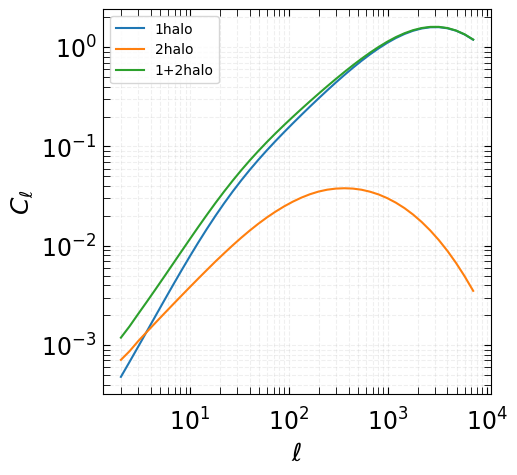

In [4]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(5,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')
ax.set_xlabel(r"$\ell$ ",size=title_size)
ax.set_ylabel(r"$C_\ell$",size=title_size)
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_ylim(1e-1,1e4)
# ax.set_xlim(5e-2,1e1)
ax.plot(l,cl_yy_1h,label='1halo')
ax.plot(l,cl_yy_2h,label='2halo')
ax.plot(l,cl_yy_2h+cl_yy_1h,label='1+2halo')
# # plt.xlim(2e-2,4e1)
# plt.ylim(1e-2,1e4)
ax.legend()

## secondary computation without varying cosmo

In [5]:
%%time
P0_B12p = 8.1
class_sz_params_to_update={
    'P0_B12' : P0_B12p
}
M.compute_class_sz(class_sz_params_to_update)

CPU times: user 666 ms, sys: 3.09 ms, total: 669 ms
Wall time: 116 ms


In [6]:
l = np.asarray(M.cl_sz()['ell'])
cl_yy_1h = np.asarray(M.cl_sz()['1h'])
cl_yy_2h = np.asarray(M.cl_sz()['2h'])

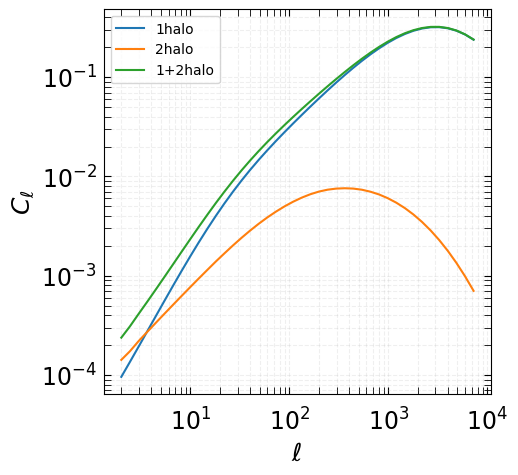

In [7]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(5,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')
ax.set_xlabel(r"$\ell$ ",size=title_size)
ax.set_ylabel(r"$C_\ell$",size=title_size)
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_ylim(1e-1,1e4)
# ax.set_xlim(5e-2,1e1)
ax.plot(l,cl_yy_1h,label='1halo')
ax.plot(l,cl_yy_2h,label='2halo')
ax.plot(l,cl_yy_2h+cl_yy_1h,label='1+2halo')
# # plt.xlim(2e-2,4e1)
# plt.ylim(1e-2,1e4)
ax.legend()

# compute class_szfast

In [8]:
%%time

M = Class()

M.set(common_params)
M.set(cosmo_params)
M.set({

'output': 'tSZ_1h,tSZ_2h',

'pressure profile':'B12',

"ell_min" : 2,
"ell_max" : 8000,
'dell': 0,
'dlogell': 0.2,
    
'M_min' : 1.0e10, 
'M_max' : 5e15,
    
'P0_B12' : 18.1,
    
'n_k_pressure_profile' :80, # this is l/ls
'n_m_pressure_profile' :30, # default: 100, decrease for faster
'n_z_pressure_profile' :30, # default: 100, decrease for faster

'k_min_gas_pressure_profile' : 1e-3, # l/ls hence no need for very extreme values...
'k_max_gas_pressure_profile' : 1e2, 

    
'k_min_samp_fftw' : 1e-3,
'k_max_samp_fftw' : 1e3,
'N_samp_fftw' : 100,
    
    
'hm_consistency' : 1,
    

'use_fft_for_profiles_transform' : 1,
'x_min_gas_pressure_fftw' : 1e-5,
'x_max_gas_pressure_fftw' : 1e2,
    
    
# 'ndim_masses' : 500, # now muted/set by k's in cosmopower emulator.
'ndim_redshifts' :80,

# # testing with 3 massive neutrinos
# 'N_ncdm': 3,
# 'N_ur': 0.00641,
# 'm_ncdm': '0.06,0.06,0.06', 
})
M.compute_class_szfast()

CPU times: user 864 ms, sys: 159 ms, total: 1.02 s
Wall time: 393 ms


In [9]:
M.get_current_derived_parameters(['Neff'])

{'Neff': 3.046000000000001}

In [10]:
l = np.asarray(M.cl_sz()['ell'])
cl_yy_1h = np.asarray(M.cl_sz()['1h'])
cl_yy_2h = np.asarray(M.cl_sz()['2h'])

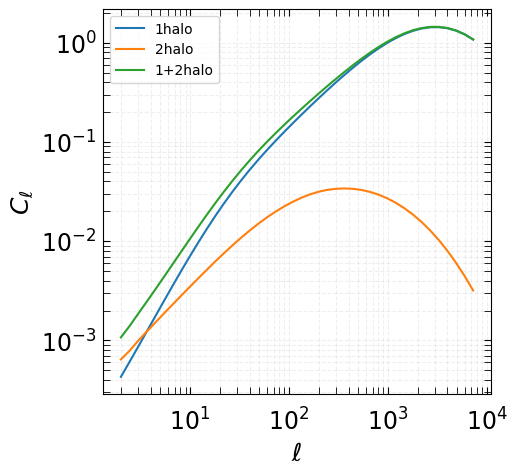

In [11]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(5,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')
ax.set_xlabel(r"$\ell$ ",size=title_size)
ax.set_ylabel(r"$C_\ell$",size=title_size)
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_ylim(1e-1,1e4)
# ax.set_xlim(5e-2,1e1)
ax.plot(l,cl_yy_1h,label='1halo')
ax.plot(l,cl_yy_2h,label='2halo')
ax.plot(l,cl_yy_2h+cl_yy_1h,label='1+2halo')
# # plt.xlim(2e-2,4e1)
# plt.ylim(1e-2,1e4)
ax.legend()

## secondary computation without varying cosmo

In [12]:
%%time
P0_B12p = 8.1
class_sz_params_to_update={
    'P0_B12' : P0_B12p
}
M.compute_class_sz(class_sz_params_to_update)

CPU times: user 595 ms, sys: 3.72 ms, total: 598 ms
Wall time: 108 ms


In [13]:
l = np.asarray(M.cl_sz()['ell'])
cl_yy_1h = np.asarray(M.cl_sz()['1h'])
cl_yy_2h = np.asarray(M.cl_sz()['2h'])

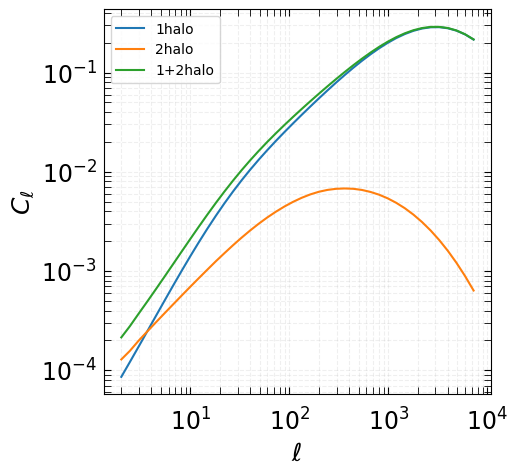

In [14]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(5,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')
ax.set_xlabel(r"$\ell$ ",size=title_size)
ax.set_ylabel(r"$C_\ell$",size=title_size)
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_ylim(1e-1,1e4)
# ax.set_xlim(5e-2,1e1)
ax.plot(l,cl_yy_1h,label='1halo')
ax.plot(l,cl_yy_2h,label='2halo')
ax.plot(l,cl_yy_2h+cl_yy_1h,label='1+2halo')
# # plt.xlim(2e-2,4e1)
# plt.ylim(1e-2,1e4)
ax.legend()

# comparison between fft and gsl integration for the pressure profile transform

## FFTLog

In [36]:
%%time

M = Class()

M.set(common_params)
M.set(cosmo_params)
M.set({

'output': 'tSZ_1h,tSZ_2h',

'pressure profile':'B12',

"ell_min" : 2,
"ell_max" : 8000,
'dell': 0,
'dlogell': 0.2,
    
'M_min' : 1.0e10, 
'M_max' : 5e15,
    
'P0_B12' : 18.1,
    
'n_k_pressure_profile' :80, # this is l/ls
'n_m_pressure_profile' :30, # default: 100, decrease for faster
'n_z_pressure_profile' :30, # default: 100, decrease for faster

'k_min_gas_pressure_profile' : 1e-3, # l/ls hence no need for very extreme values...
'k_max_gas_pressure_profile' : 1e2, 

    
'k_min_samp_fftw' : 1e-3,
'k_max_samp_fftw' : 1e3,
'N_samp_fftw' : 1024,
    
    
'hm_consistency' : 1,
    

'use_fft_for_profiles_transform' : 1,
'x_min_gas_pressure_fftw' : 1e-5,
'x_max_gas_pressure_fftw' : 1e2,
    
    
# 'ndim_masses' : 500, # now muted/set by k's in cosmopower emulator.
'ndim_redshifts' :80,

# # testing with 3 massive neutrinos
# 'N_ncdm': 3,
# 'N_ur': 0.00641,
# 'm_ncdm': '0.06,0.06,0.06', 
})
M.compute_class_szfast()

CPU times: user 1e+03 ms, sys: 122 ms, total: 1.12 s
Wall time: 402 ms


In [37]:
l_fft = np.asarray(M.cl_sz()['ell'])
cl_yy_1h_fft = np.asarray(M.cl_sz()['1h'])
cl_yy_2h_fft = np.asarray(M.cl_sz()['2h'])

## GSL

In [39]:
%%time

M = Class()

M.set(common_params)
M.set(cosmo_params)
M.set({

'output': 'tSZ_1h,tSZ_2h',

'pressure profile':'B12',

"ell_min" : 2,
"ell_max" : 8000,
'dell': 0,
'dlogell': 0.2,
    
'M_min' : 1.0e10, 
'M_max' : 5e15,
    
'P0_B12' : 18.1,
    
'n_k_pressure_profile' :80, # this is l/ls
'n_m_pressure_profile' :30, # default: 100, decrease for faster
'n_z_pressure_profile' :30, # default: 100, decrease for faster

'k_min_gas_pressure_profile' : 1e-3, # l/ls hence no need for very extreme values...
'k_max_gas_pressure_profile' : 1e2, 
    
'hm_consistency' : 1,
    

'use_fft_for_profiles_transform' : 0,

    
    
# 'ndim_masses' : 500, # now muted/set by k's in cosmopower emulator.
'ndim_redshifts' :80,

# # testing with 3 massive neutrinos
# 'N_ncdm': 3,
# 'N_ur': 0.00641,
# 'm_ncdm': '0.06,0.06,0.06', 
})
M.compute_class_szfast()

CPU times: user 5.39 s, sys: 127 ms, total: 5.52 s
Wall time: 846 ms


In [40]:
l_gsl = np.asarray(M.cl_sz()['ell'])
cl_yy_1h_gsl = np.asarray(M.cl_sz()['1h'])
cl_yy_2h_gsl = np.asarray(M.cl_sz()['2h'])

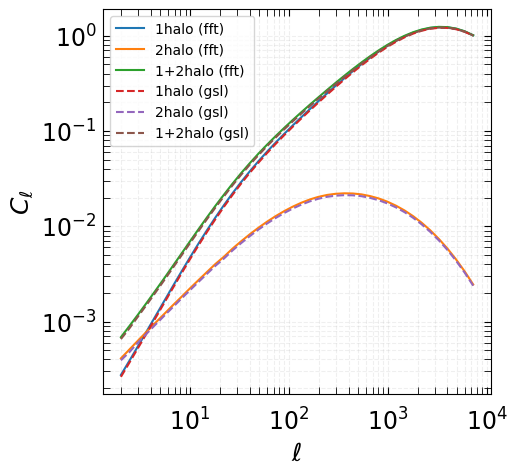

In [41]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(5,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')
ax.set_xlabel(r"$\ell$ ",size=title_size)
ax.set_ylabel(r"$C_\ell$",size=title_size)
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_ylim(1e-1,1e4)
# ax.set_xlim(5e-2,1e1)
ax.plot(l_fft,cl_yy_1h_fft,label='1halo (fft)')
ax.plot(l_fft,cl_yy_2h_fft,label='2halo (fft)')
ax.plot(l_fft,cl_yy_2h_fft+cl_yy_1h_fft,label='1+2halo (fft)')


ax.plot(l_gsl,cl_yy_1h_gsl,label='1halo (gsl)',ls='--')
ax.plot(l_gsl,cl_yy_2h_gsl,label='2halo (gsl)',ls='--')
ax.plot(l_gsl,cl_yy_2h_gsl+cl_yy_1h_gsl,label='1+2halo (gsl)',ls='--')
# # plt.xlim(2e-2,4e1)
# plt.ylim(1e-2,1e4)
ax.legend()